In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [2]:
DATA_PATH = './data/'
with open(DATA_PATH+'importance_scores.pkl','rb') as f:
    scores_labels = pickle.load(f)

In [3]:
len(scores_labels)

140

In [42]:
scl = scores_labels[6] # look at dataframe for first graph

In [43]:
# cell type counts for 100 most important cells in first graph
scl.sort_values('score_campp',ascending=False).cell_type[:100].value_counts()

dirt                          29
tumor cells                   22
CD8+ T cells                  21
CD4+ T cells CD45RO+          18
immune cells / vasculature     3
CD68+CD163+ macrophages        2
undefined                      2
granulocytes                   1
stroma                         1
plasma cells                   1
Name: cell_type, dtype: int64

In [44]:
# cell type counts for 100 most important cells in first graph, using slightly
# different metric
scl.sort_values('score_cam',ascending=False).cell_type[:100].value_counts()

dirt                          30
tumor cells                   23
CD8+ T cells                  19
CD4+ T cells CD45RO+          18
immune cells / vasculature     3
CD68+CD163+ macrophages        2
undefined                      2
granulocytes                   1
stroma                         1
plasma cells                   1
Name: cell_type, dtype: int64

In [45]:
# cell type counts in entire graph
scl.cell_type.value_counts()

dirt                          233
tumor cells                   191
granulocytes                   90
CD4+ T cells CD45RO+           39
CD8+ T cells                   37
CD68+CD163+ macrophages        36
stroma                         11
immune cells / vasculature      9
vasculature                     5
undefined                       4
Tregs                           3
immune cells                    3
plasma cells                    3
CD68+ macrophages               2
Name: cell_type, dtype: int64

In [46]:
# actual stage and predicted stage
scl.attrs

{'stage': 3.0, 'pred': 3.0}

In [54]:
df = pd.read_csv(DATA_PATH+'CRC_master.csv')

In [55]:
df['ClusterName'].unique()

array(['granulocytes', 'vasculature', 'CD4+ T cells CD45RO+',
       'tumor cells', 'stroma', 'CD68+CD163+ macrophages', 'adipocytes',
       'plasma cells', 'CD8+ T cells', 'dirt', 'Tregs', 'CD4+ T cells',
       'CD11c+ DCs', 'B cells', 'CD11b+CD68+ macrophages',
       'smooth muscle', 'undefined', 'tumor cells / immune cells',
       'immune cells / vasculature', 'immune cells', 'NK cells', 'nerves',
       'CD68+ macrophages GzmB+', 'CD68+ macrophages', 'lymphatics',
       'CD11b+ monocytes', 'CD4+ T cells GATA3+', 'CD163+ macrophages',
       'CD3+ T cells'], dtype=object)

In [57]:
coarse_map = {
    'stroma': ['stroma'],
    'tumor': ['tumor cells'],
    'immune': ['granulocytes','CD4+ T cells CD45RO+','CD68+CD163+ macrophages',
              'plasma cells', 'CD8+ T cells', 'Tregs', 'CD4+ T cells',
              'CD11c+ DCs', 'B cells', 'CD11b+CD68+ macrophages',
              'immune cells', 'NK cells','CD68+ macrophages GzmB+', 'CD68+ macrophages',
              'CD11b+ monocytes', 'CD4+ T cells GATA3+', 'CD163+ macrophages','CD3+ T cells']
}

In [62]:
new_dic = {}
for k,v in coarse_map.items():
    for x in v:
        new_dic[x] = k

In [63]:
new_dic

{'stroma': 'stroma',
 'tumor cells': 'tumor',
 'granulocytes': 'immune',
 'CD4+ T cells CD45RO+': 'immune',
 'CD68+CD163+ macrophages': 'immune',
 'plasma cells': 'immune',
 'CD8+ T cells': 'immune',
 'Tregs': 'immune',
 'CD4+ T cells': 'immune',
 'CD11c+ DCs': 'immune',
 'B cells': 'immune',
 'CD11b+CD68+ macrophages': 'immune',
 'immune cells': 'immune',
 'NK cells': 'immune',
 'CD68+ macrophages GzmB+': 'immune',
 'CD68+ macrophages': 'immune',
 'CD11b+ monocytes': 'immune',
 'CD4+ T cells GATA3+': 'immune',
 'CD163+ macrophages': 'immune',
 'CD3+ T cells': 'immune'}

In [58]:
scl.head()

,cell_type,score_campp,score_cam,X,Y,cell_id,graph_id
0,granulocytes,0.007010,0.006419,322.0,254.0,15419,87
1,granulocytes,0.008626,0.007644,328.0,270.0,15420,87
2,granulocytes,0.000150,0.000000,419.0,367.0,15421,87
3,granulocytes,0.010105,0.011079,426.0,562.0,15422,87
4,granulocytes,0.000024,0.000000,437.0,246.0,15423,87


In [65]:
scl['coarse_type'] = scl['cell_type'].map(new_dic).fillna('other')

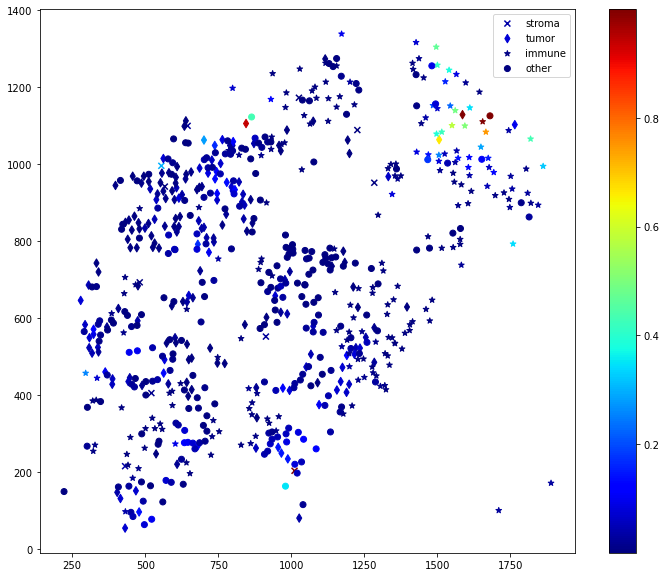

In [76]:
fig, ax = plt.subplots(figsize=(12,10))

mkr_dict = {'stroma': 'x', 'tumor': 'd', 'immune': '*', 'other':'o'}
for k,v in mkr_dict.items():
    d = scl[scl.coarse_type==k]
    ax.scatter(d.X, d.Y, 
                c = d.score_campp, 
                marker = v,label=k,
              cmap = 'jet')
ax.legend()
norm = plt.Normalize(np.min(scl.score_campp), np.max(scl.score_campp))
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])
ax.figure.colorbar(sm)
plt.show()

In [11]:
# list of dataframes for graphs that we predicted wrong
mismatch = [scl for scl in scores_labels if scl.attrs['stage'] != scl.attrs['pred']]

In [12]:
len(mismatch)

7

In [18]:
scl = mismatch[5]

In [19]:
scl.sort_values('score_campp',ascending=False).cell_type[:100].value_counts()

CD68+CD163+ macrophages       27
B cells                       27
adipocytes                    12
undefined                     11
immune cells / vasculature     8
stroma                         4
tumor cells                    4
vasculature                    3
immune cells                   2
dirt                           1
plasma cells                   1
Name: cell_type, dtype: int64

In [20]:
scl.sort_values('score_campp',ascending=False).head()

,cell_type,score_campp,score_cam,X,Y,cell_id,graph_id
603,B cells,0.777668,0.783499,468.0,65.0,210697,137
304,CD68+CD163+ macrophages,0.651524,0.816143,987.0,220.0,157233,137
424,adipocytes,0.651524,0.816143,952.0,190.0,159646,137
586,B cells,0.638378,0.641384,401.0,132.0,210680,137
553,B cells,0.613860,0.617660,288.0,202.0,210647,137


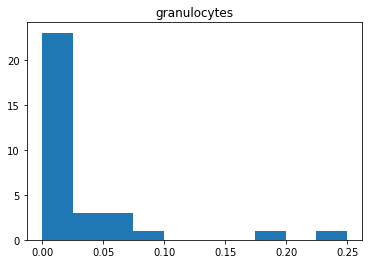

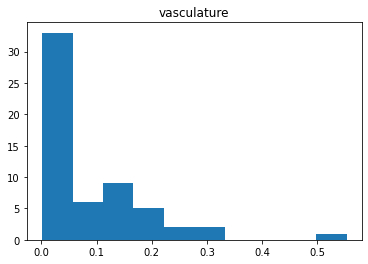

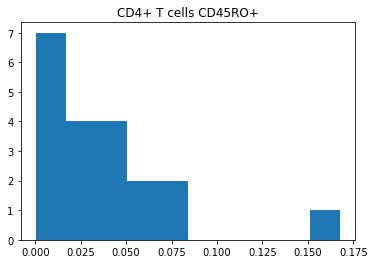

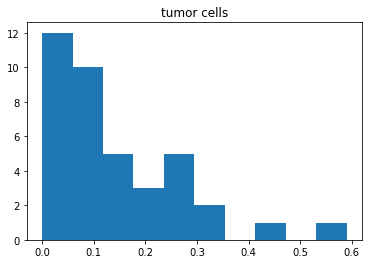

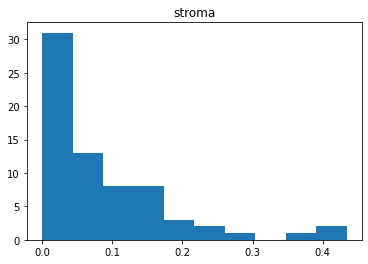

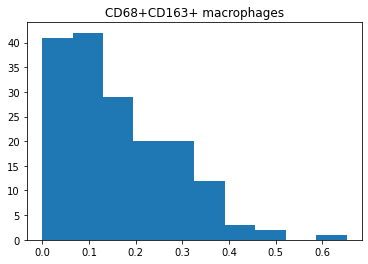

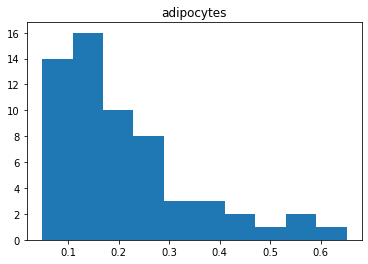

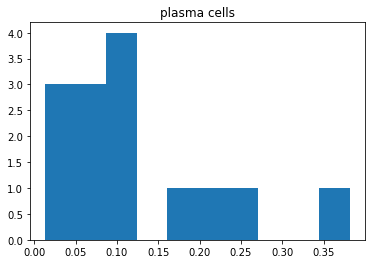

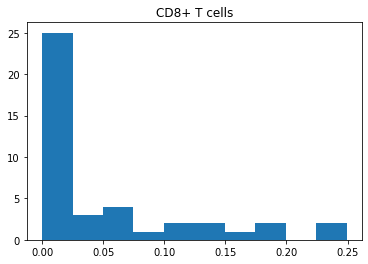

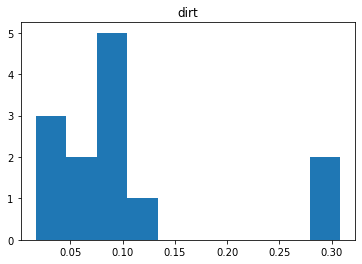

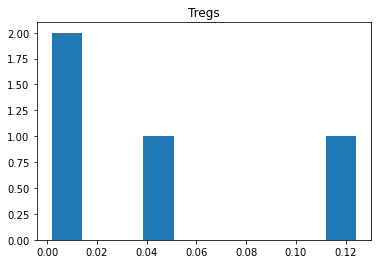

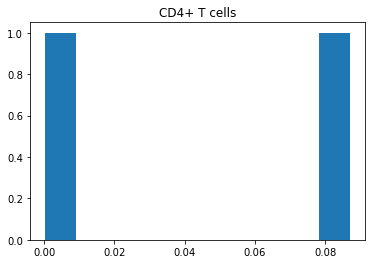

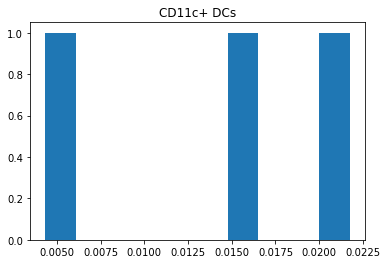

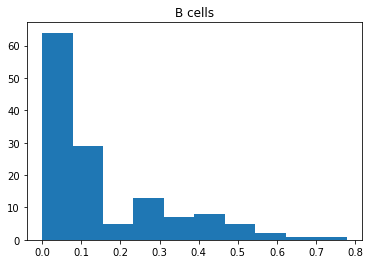

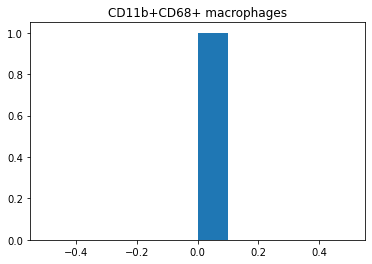

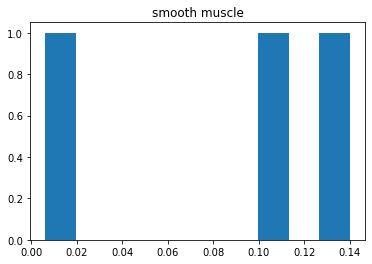

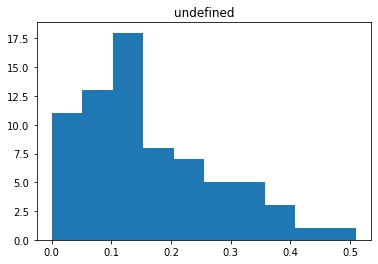

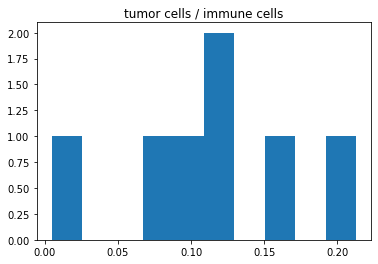

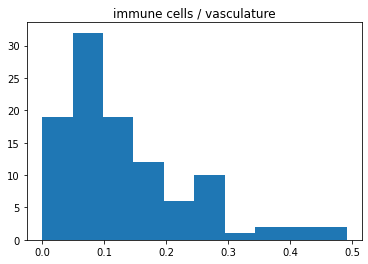

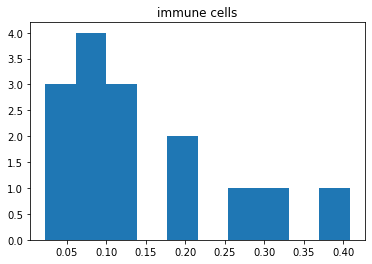

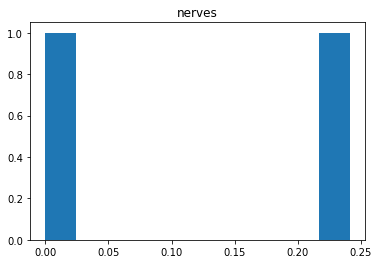

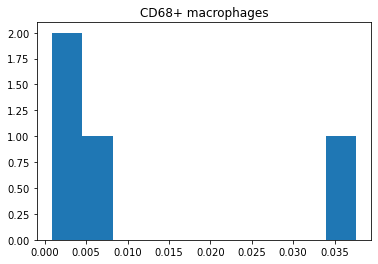

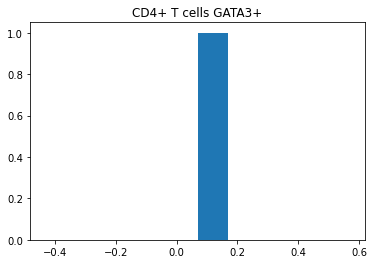

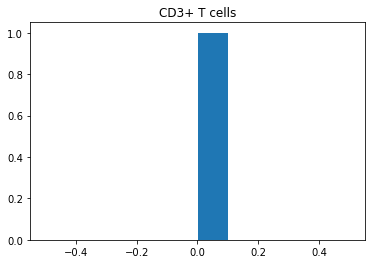

In [21]:
# plot histogram of scores per cell type
for ct in scl.cell_type.unique():
    plt.hist(scl[scl['cell_type'] == ct].score_campp)
    plt.title(ct)
    plt.show()